<a href="https://colab.research.google.com/github/shatakshigarg/EDA_Project/blob/main/Copy_of_ML_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*Take any Dataset of your choice ,perform EDA(Exploratory Data Analysis) and apply a
suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.*





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/master/heart.csv")

In [ ]:
data
#age
#sex
#chol
#oldpeak

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df=data.drop(['cp', 'trestbps', 'fbs', 'thalach', 'exang', 'slope', 'ca', 'thal','restecg'], axis=1)
df

,age,sex,chol,oldpeak,target
0,63,1,233,2.3,1
1,37,1,250,3.5,1
2,41,0,204,1.4,1
3,56,1,236,0.8,1
4,57,0,354,0.6,1
...,...,...,...,...,...
298,57,0,241,0.2,0
299,45,1,264,1.2,0
300,68,1,193,3.4,0
301,57,1,131,1.2,0


In [ ]:
df.shape

(303, 5)

In [ ]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]

Exploratory Data Analysis (EDA):

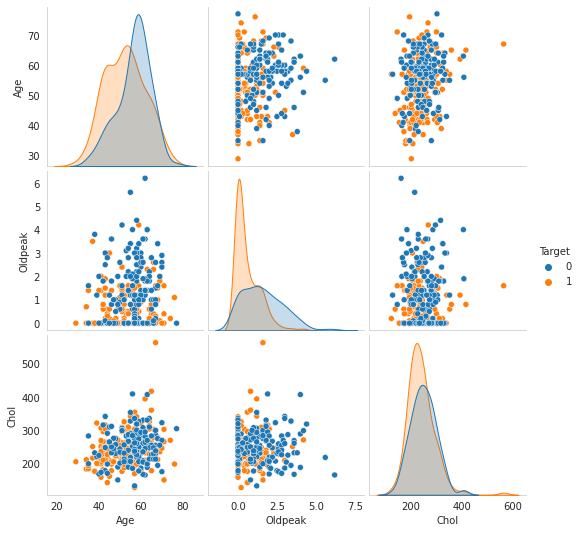

In [ ]:
#1 Data visualizations taking apparently 2 different attributes paired and the classifying hue of plot as Target
df_3d = pd.DataFrame()
df_3d['Age'] = df['age']
df_3d['Oldpeak'] = df['oldpeak']
df_3d['Chol'] = df['chol']
df_3d['Target'] = df['target']
sns.pairplot(df_3d, hue='Target')

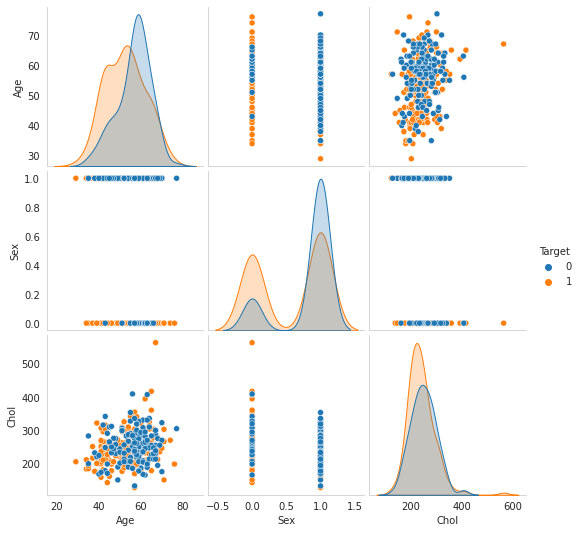

In [ ]:
df_3d = pd.DataFrame()
df_3d['Age'] = df['age']
df_3d['Sex'] = df['sex']
df_3d['Chol'] = df['chol']
df_3d['Target'] = df['target']
sns.pairplot(df_3d, hue='Target')

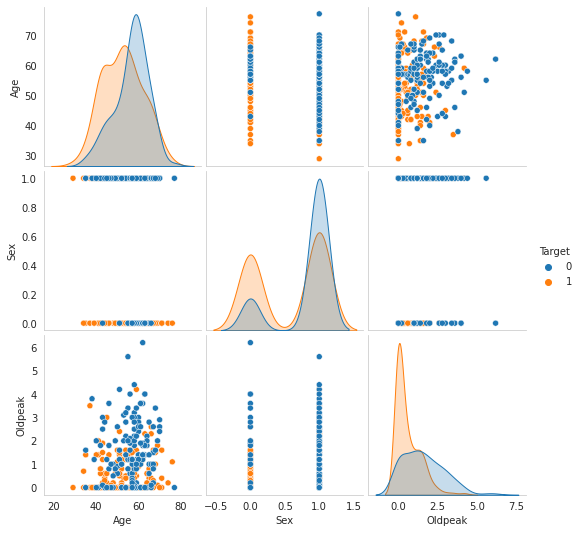

In [ ]:
df_3d = pd.DataFrame()
df_3d['Age'] = df['age']
df_3d['Sex'] = df['sex']
df_3d['Oldpeak'] = df['oldpeak']
df_3d['Target'] = df['target']
sns.pairplot(df_3d, hue='Target')

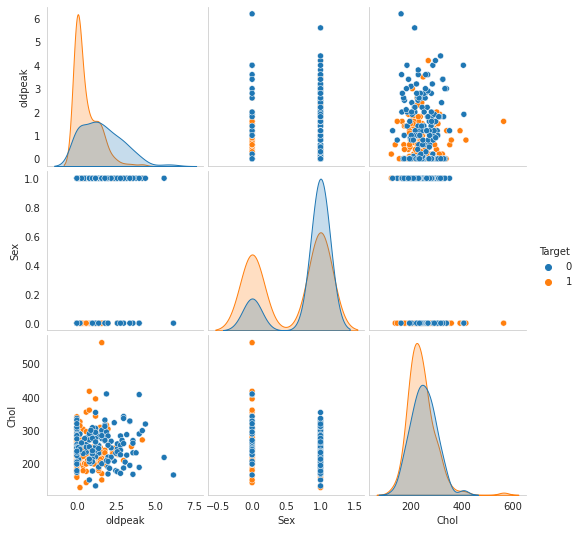

In [ ]:
df_3d = pd.DataFrame()
df_3d['oldpeak'] = df['oldpeak']
df_3d['Sex'] = df['sex']
df_3d['Chol'] = df['chol']
df_3d['Target'] = df['target']
sns.pairplot(df_3d, hue='Target')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(303, 4)
(227, 4)
(76, 4)
(303,)
(227,)
(76,)


In [ ]:
#NORMALIZATION OR SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log = model.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred_log,y_test)*100
print("The accuracy obtained by using Logistic Regression is = ", round(acc,2), "%" )

The accuracy obtained by using Logistic Regression is =  72.37 %


Random Forest (RF) Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
rf_accuracy=max_accuracy
print("The accuracy obtained by using Random Forest Classifier is = ", rf_accuracy , "%")

The accuracy obtained by using Random Forest Classifier is =  73.68 %


XG Boost Model Classification: 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

xgb_accuracy=round(accuracy_score(y_pred_xgb,y_test)*100,2)
y_pred_xgb


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
print("The accuracy obtained by using Random Forest Classifier is = ", xgb_accuracy , "%")

The accuracy obtained by using Random Forest Classifier is =  65.79 %
